In [1]:
import pandas as pd
from urllib.request import urlretrieve
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x211b64f2820>)

# you can also use requests.get

In [4]:
'''import requests

url = "http://example.com/file.txt"
response = requests.get(url)

# 保存下载的内容到文件
with open("local_file.txt", "wb") as f:
    f.write(response.content)'
    '''

'import requests\n\nurl = "http://example.com/file.txt"\nresponse = requests.get(url)\n\n# 保存下载的内容到文件\nwith open("local_file.txt", "wb") as f:\n    f.write(response.content)\'\n    '

# Other Steps

In [5]:
df = pd.read_csv(r"D:\Machine_learning_course\models\medical.csv")

In [6]:
#Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:

'''according to the describe, we can see the variance of charges is very huge, that might be a problem when we train model,
teh 50% (median)is 9382, however the max is 63770'''
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Obeserve every features with PX

In [9]:
df.age.describe() # 64-18+1=47, we will take 47bins

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title="Distribution of Age")
fig.update_layout(bargap=0.1)
fig.show()
'''the age18,19 is particularly high compare to others, I think for this insurance company,they charge very small fee for people who just adult'''

'the age18,19 is particularly high compare to others, I think for this insurance company,they charge very small fee for people who just adult'

In [11]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [12]:
fig_bmi = px.histogram(df,
                       x="bmi",
                       marginal='box',
                       color= 'sex',
                       title="Distribution of BMI")
fig_bmi.update_layout(bargap=0.1)
fig_bmi.show()

In [13]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [14]:
'''according to the graph, most of people charged under 12000, however, these people do not smoke, smoker people will be charge more'''
fig_charges = px.histogram(
    df,
    x="charges",
    marginal="box",
    color = 'smoker',
    color_discrete_sequence=("green",'gray'),
    title = "Annual Medical charges"
)
fig_charges.update_layout(bargap=0.1),
fig_charges.show()

In [15]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
'''make smoker is more than female'''
px.histogram(df,x="smoker",color='sex',title='smoker')

# Visualize the relationship between "age and "charges" using a scatter plot

In [17]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [18]:
fig_scatter_bmi_chargers = px.scatter(
    df,
    x = 'bmi',
    y = 'charges',
    color = 'smoker',
    opacity = 0.8,
    hover_data=['sex'],
    title = "BMI VS CHARGES"
)
fig_scatter_bmi_chargers.update_traces(marker_size=5)
fig_scatter_bmi_chargers.show()

In [19]:
px.violin(df, x='sex', y = 'charges')

# Correlation

In [20]:
df.charges.corr(df.age)

np.float64(0.2990081933306478)

In [21]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362887)

In [22]:
df.charges.corr(df.children)

np.float64(0.06799822684790487)

In [23]:
somker_values = {'no':0,"yes":1}
sex_values = {"female":0, "male":1}
df["smoker"] =df.smoker.map(somker_values)# you cannot do it again, it will be Nan, this best way is to create anoter df for new data
df['sex'] = df.sex.map(sex_values) #
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [24]:
df.charges.corr((df.smoker))

np.float64(0.7872514304984778)

In [25]:
df.smoker.corr((df.charges))

np.float64(0.7872514304984778)

In [26]:
df.charges.corr((df.sex))

np.float64(0.05729206220202533)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [28]:
df_without_region = df.drop('region',axis=1)

In [29]:
df_without_region.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

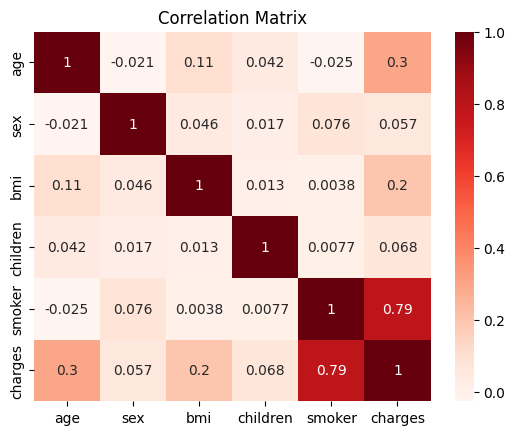

In [30]:
sns.heatmap(df_without_region.corr(), cmap = 'Reds', annot=True)
plt.title("Correlation Matrix")

# Create model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [34]:
df_encoded = pd.get_dummies(df, columns=['region'], dtype = int,drop_first=True)
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [35]:
input = df_encoded.drop("charges",axis=1)
target = df_encoded['charges']

In [36]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [37]:
input.shape, target.shape

((1338, 8), (1338,))

In [38]:
model.fit(input,target)

LinearRegression()

In [39]:
result = model.predict(input)

In [40]:
print(result[:50])

[25293.7130284   3448.60283431  6706.9884907   3754.83016298
  5592.49338649  3719.82579905 10659.96122506  8047.9106069
  8502.97391983 11884.63751795  3245.20823155 35717.4636691
  4546.04698571 14917.07843932 31969.0012761    670.02627532
 12333.86680307  1925.91107415 15023.54799575 30497.85010363
 15685.50287333  6272.46945079  3085.03612885 31945.66753642
  7537.76583664 13009.90834369 12073.69251029 13903.66344636
  -142.74199045 32044.90100008 28544.75731942  1610.75150127
  4060.11662976 13361.70004659 30832.75074268  -614.51984678
 16241.60521545   703.58507421 33682.37843422 39763.83056636
  3248.55975078  8364.64359917  5289.36943387  7928.28387984
 10733.30646229 13749.11128238  6750.79174367  6694.2317775
 10758.23594376 32405.59836056]


In [41]:
charges_mean = np.mean(target)
charges_mean

np.float64(13270.422265141257)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(target, result)

# 2. MSE 和 RMSE
mse = mean_squared_error(target, result)  
rmse = np.sqrt(mse)  # squared=False => 直接得到RMSE

# 3. MAE
mae = mean_absolute_error(target, result)

print("R^2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R^2: 0.7509130345985207
MSE: 36501893.00741544
RMSE: 6041.6796511744515
MAE: 4170.886894163586


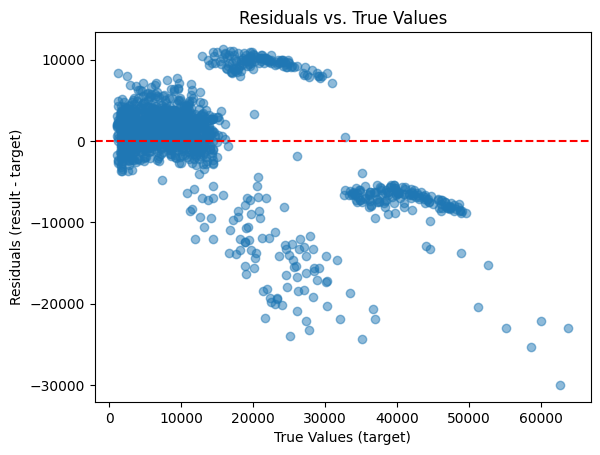

In [43]:
residuals = result - target

plt.scatter(target, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # 残差为0的水平线

plt.xlabel('True Values (target)')
plt.ylabel('Residuals (result - target)')
plt.title('Residuals vs. True Values')
plt.show()

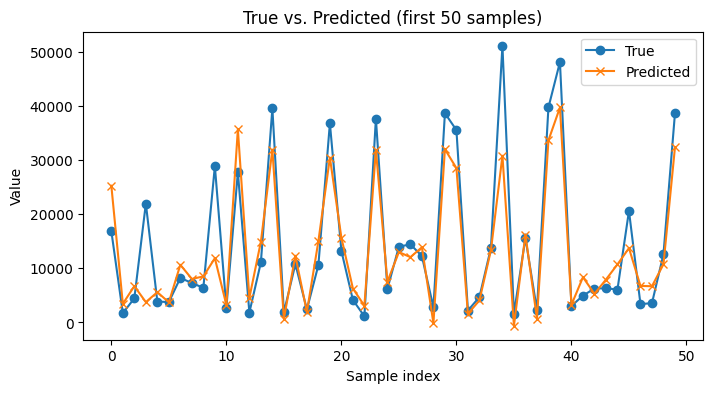

In [44]:
plt.figure(figsize=(8,4))
plt.plot(target[:50], label='True', marker='o')     # 先画前50个点
plt.plot(result[:50], label='Predicted', marker='x')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('True vs. Predicted (first 50 samples)')
plt.show()

In [45]:
model.coef_, model.intercept_

(array([  256.85635254,  -131.3143594 ,   339.19345361,   475.50054515,
        23848.53454191,  -352.96389942, -1035.02204939,  -960.0509913 ]),
 np.float64(-11938.538576167139))

# update model

In [46]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler


In [47]:
scaler_y = StandardScaler()
model_1 = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=scaler_y)

In [48]:
model_1.fit(input,target)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [49]:
result_1 = model_1.predict(input)

In [50]:
print(result_1[:50])

[25293.7130284   3448.60283431  6706.9884907   3754.83016298
  5592.49338649  3719.82579905 10659.96122506  8047.9106069
  8502.97391983 11884.63751795  3245.20823155 35717.4636691
  4546.04698571 14917.07843932 31969.0012761    670.02627532
 12333.86680307  1925.91107415 15023.54799575 30497.85010363
 15685.50287333  6272.46945079  3085.03612885 31945.66753642
  7537.76583664 13009.90834369 12073.69251029 13903.66344636
  -142.74199045 32044.90100008 28544.75731942  1610.75150127
  4060.11662976 13361.70004659 30832.75074268  -614.51984678
 16241.60521545   703.58507421 33682.37843422 39763.83056636
  3248.55975078  8364.64359917  5289.36943387  7928.28387984
 10733.30646229 13749.11128238  6750.79174367  6694.2317775
 10758.23594376 32405.59836056]


In [51]:
print(target[:50])

0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
11    27808.72510
12     1826.84300
13    11090.71780
14    39611.75770
15     1837.23700
16    10797.33620
17     2395.17155
18    10602.38500
19    36837.46700
20    13228.84695
21     4149.73600
22     1137.01100
23    37701.87680
24     6203.90175
25    14001.13380
26    14451.83515
27    12268.63225
28     2775.19215
29    38711.00000
30    35585.57600
31     2198.18985
32     4687.79700
33    13770.09790
34    51194.55914
35     1625.43375
36    15612.19335
37     2302.30000
38    39774.27630
39    48173.36100
40     3046.06200
41     4949.75870
42     6272.47720
43     6313.75900
44     6079.67150
45    20630.28351
46     3393.35635
47     3556.92230
48    12629.89670
49    38709.17600
Name: charges, dtype: float64


In [52]:
r2_1 = r2_score(target,result_1)
r2_1

0.7509130345985207

In [53]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# fit_transform data for num_variables

In [54]:
num_column = ['age','bmi','children']
df_num = df[num_column]

In [55]:
scaler = StandardScaler()
scaler_x = scaler.fit_transform(df_num)

In [56]:
df_num

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [57]:
scaler_x[0]

array([-1.43876426, -0.45332   , -0.90861367])

In [58]:
df_encoded

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [59]:
df_encoded[num_column] = scaler_x

In [60]:
df_encoded

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,0,1,0
2,-0.797954,1,0.383307,1.580926,0,4449.46200,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,10600.54830,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,2205.98080,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,1629.83350,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,2007.94500,0,0,1


# model after transformation

In [61]:
input = df_encoded.drop('charges',axis=1)
target = df_encoded['charges']

In [62]:
input

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,0,0,1


In [63]:
input.shape, target.shape

((1338, 8), (1338,))

In [64]:
model = LinearRegression()
model.fit(input,target)

LinearRegression()

In [65]:
prediction = model.predict(input)

In [66]:
r2 = r2_score(target,prediction)
rmse = np.sqrt(mean_squared_error(target,prediction))

In [67]:
r2, rmse

(0.7509130345985207, np.float64(6041.6796511744515))

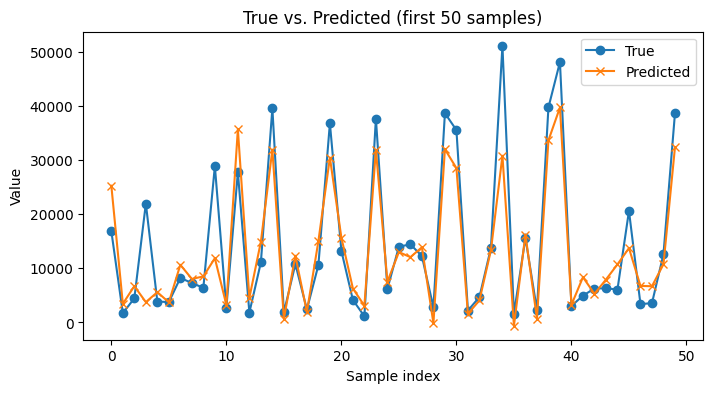

In [68]:
plt.figure(figsize=(8,4))
plt.plot(target[:50], label='True', marker='o')   
plt.plot(prediction[:50], label='Predicted', marker='x')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('True vs. Predicted (first 50 samples)')
plt.show()

In [69]:
model.coef_

array([ 3607.47273619,  -131.3143594 ,  2067.69196584,   572.99820995,
       23848.53454191,  -352.96389942, -1035.02204939,  -960.0509913 ])